# Project 2 
I tried to make a text generator that makes dad jokes.
If you do not know what a dad joke is, its pretty much just puns.
https://www.kaggle.com/datasets/aryashah2k/dad-a-base-of-jokes/

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import string

## First I loaded the data into a pandas dataframe
This was probably unneccesarry since it was only one column, but pandas has some neat functions.

In [2]:
df = pd.read_csv('dad-a-base.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Joke    743 non-null    object
dtypes: object(1)
memory usage: 5.9+ KB
None


,Joke
0,I'm tired of following my dreams. I'm just goi...
1,Did you hear about the guy whose whole left si...
2,Why didn’t the skeleton cross the road? Becaus...
3,What did one nut say as he chased another nut?...
4,Where do fish keep their money? In the riverba...


## Next I start cleaning up the data

### First I convert it all to lowercase and remove punctuation.

In [3]:
df['Joke'] = df['Joke'].str.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# pandas has a very neat "apply" method for their dataframes that applies a given function to all rows.
df['Joke'] = df['Joke'].apply(remove_punctuation)

### I was using stopwords, but I liked my results more when I stopped using them.

In [4]:
'''
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours',
             'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'itself',
             'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these',
             'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
             'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
             'in', 'out', 'on', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
             'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
             'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'dont', 'should', 'shouldve', 'now', 'arent', 'couldnt',
             'didnt', 'doesnt', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shouldnt', 'wasnt',
             'werent', 'wont', 'wouldnt', '\t']
def remove_stopwords(text):
    words = text.split(' ')
    new_text = [ word for word in words if word not in stopwords ]
    return ' '.join(new_text)

df['Joke'] = df['Joke'].apply(remove_stopwords)
df.head(5)
'''

"\nstopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours',\n             'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'itself',\n             'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these',\n             'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',\n             'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',\n             'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',\n             'in', 'out', 'on', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',\n             'how', 'all', 'any', 'both', 'each', 'few', 'more',

## Next I make a tokenizer

In [5]:
# got this number from the tokenizer.word_index after running the tokenizer a first time. 
num_words = 2610

# oov is probably unneccessary since I made num_words cover every word.
tokenizer = Tokenizer(num_words = num_words, oov_token='OOV')

def tokenize(text):
    tokenizer.fit_on_texts([text])
    return text

df['Joke'] = df['Joke'].apply(tokenize)

df.head(5)

,Joke
0,im tired of following my dreams im just going ...
1,did you hear about the guy whose whole left si...
2,why didn’t the skeleton cross the road because...
3,what did one nut say as he chased another nut ...
4,where do fish keep their money in the riverban...


### This saves the tokenizer in a json file, so I can use it later if I want without rerunning everything.

In [6]:
import io
import json

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [7]:
## word index and word count.
print(tokenizer.word_index)
print(len(tokenizer.word_index) + 1)

{'OOV': 1, 'a': 2, 'the': 3, 'i': 4, 'to': 5, 'you': 6, 'what': 7, 'do': 8, 'it': 9, 'in': 10, 'was': 11, 'why': 12, 'of': 13, 'did': 14, 'my': 15, 'and': 16, 'they': 17, 'is': 18, 'because': 19, 'on': 20, 'he': 21, 'but': 22, 'with': 23, 'about': 24, 'call': 25, 'me': 26, 'have': 27, 'are': 28, 'how': 29, 'get': 30, 'for': 31, 'an': 32, 'when': 33, 'its': 34, 'say': 35, 'that': 36, 'his': 37, 'just': 38, 'at': 39, 'got': 40, 'know': 41, 'go': 42, 'can': 43, 'hear': 44, 'up': 45, 'all': 46, 'out': 47, 'one': 48, 'does': 49, 'so': 50, 'from': 51, 'be': 52, 'dont': 53, 'where': 54, 'into': 55, 'if': 56, 'two': 57, 'dad': 58, 'their': 59, 'who': 60, 'no': 61, 'always': 62, 'never': 63, 'im': 64, 'going': 65, 'down': 66, 'like': 67, 'doctor': 68, 'man': 69, 'now': 70, 'well': 71, 'other': 72, 'your': 73, 'cant': 74, 'them': 75, 'little': 76, 'were': 77, 'people': 78, 'whats': 79, 'had': 80, 'as': 81, 'day': 82, 'take': 83, 'not': 84, 'this': 85, 'has': 86, 'make': 87, 'says': 88, 'there': 

## Next I add a 'Token' column to the dataframe.

In [8]:
def text_to_sequence(text):
    token_list = tokenizer.texts_to_sequences([text])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
    return n_gram_sequence

# this converts each row in 'Joke' to tokens and puts it in the 'Tokens' column.
df['Tokens'] = df['Joke'].apply(text_to_sequence)

df.head(5)

,Joke,Tokens
0,im tired of following my dreams im just going ...,"[64, 534, 13, 940, 15, 941, 64, 38, 65, 5, 535..."
1,did you hear about the guy whose whole left si...,"[14, 6, 44, 24, 3, 155, 942, 536, 171, 298, 11..."
2,why didn’t the skeleton cross the road because...,"[12, 390, 3, 391, 143, 3, 194, 19, 21, 80, 61,..."
3,what did one nut say as he chased another nut ...,"[7, 14, 48, 538, 35, 81, 21, 943, 539, 538, 64..."
4,where do fish keep their money in the riverban...,"[54, 8, 112, 195, 59, 540, 10, 3, 945]"


I do this to find out how much to pad the numpy arrays.
It gets the longest array in the Tokens column.

In [9]:
max_sequence_len = max(df['Tokens'].str.len())
max_sequence_len

52

## Making the padded sequences.
For some reason I couldn't save a 2D array back into the Tokens column without flattening it, but flattening it made problems elsewhere.
So I just use the sequences variable from now on.

In [10]:
sequences = tf.keras.utils.pad_sequences(df['Tokens'], maxlen=max_sequence_len, padding='pre')
print(sequences.shape)
df['Tokens'] = sequences.tolist()
print(df['Tokens'].shape)
df.head(5)

(743, 52)
(743,)


,Joke,Tokens
0,im tired of following my dreams im just going ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,did you hear about the guy whose whole left si...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,why didn’t the skeleton cross the road because...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,what did one nut say as he chased another nut ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,where do fish keep their money in the riverban...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Making custom labels
Since text generators work by looking at the previous word and choosing the next likely word, I have to make my own labels from the dataset.
This makes it so a word is an input value and its label is the word that came after it.

In [11]:
xs, labels = sequences[:, :-1], sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=num_words)

In [12]:
print(len(xs), len(labels), len(ys))

743 743 743


## Making the model

In [13]:
model = Sequential()
model.add(Embedding(num_words, 8))
model.add(Bidirectional(LSTM(max_sequence_len-1, return_sequences='True')))
model.add(Bidirectional(LSTM(max_sequence_len-1)))
model.add(Dense(num_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
24/24 [==============================] - 5s 37ms/step - loss: 7.8624 - accuracy: 0.0040
Epoch 2/500
24/24 [==============================] - 1s 37ms/step - loss: 7.2168 - accuracy: 0.0175
Epoch 3/500
24/24 [==============================] - 1s 37ms/step - loss: 6.5136 - accuracy: 0.0256
Epoch 4/500
24/24 [==============================] - 1s 37ms/step - loss: 6.3781 - accuracy: 0.0256
Epoch 5/500
24/24 [==============================] - 1s 38ms/step - loss: 6.3421 - accuracy: 0.0256
Epoch 6/500
24/24 [==============================] - 1s 37ms/step - loss: 6.3268 - accuracy: 0.0256
Epoch 7/500
24/24 [==============================] - 1s 37ms/step - loss: 6.3220 - accuracy: 0.0256
Epoch 8/500
24/24 [==============================] - 1s 37ms/step - loss: 6.3135 - accuracy: 0.0256
Epoch 9/500
24/24 [==============================] - 1s 38ms/step - loss: 6.3139 - accuracy: 0.0256
Epoch 10/500
24/24 [==============================] - 1s 39ms/step - loss: 6.3030 - accuracy: 0.0256

Honestly, I was slightly concerned about the model. Each epoch only took 1s and it seems to only be training on 24 samples for some reason.

## Graphing accuracy and loss.

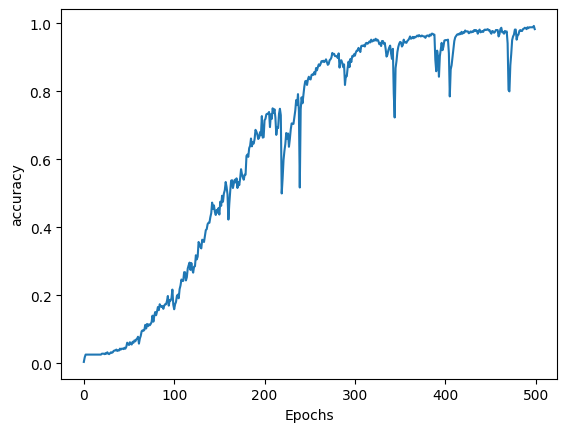

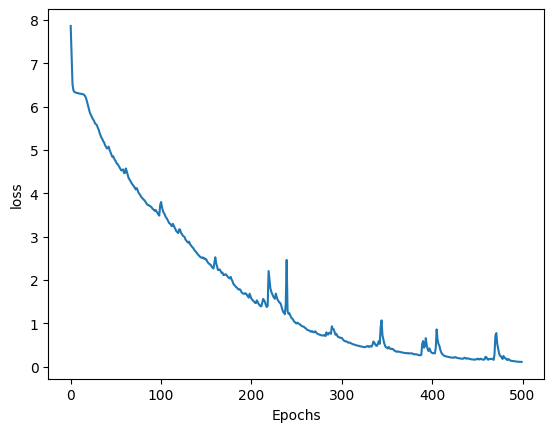

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Testing

In [15]:
seed_text = "i saw a dog"
next_words = 10

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
i saw a dog tentickles crayon plagiarism carrot eehive kernel language neverlands positive carrot


It doesn't look to good, but I'm not sure what else I can do. It might just be because puns are something that require a lot of context.
Or maybe I just made some mistakes somewhere.

## Saving the model
Saving the model to a file so it can be used without running the whole notebook again.

In [16]:
model.save(filepath='model.keras')

## Free testing the saved model.
If you want, you can run these cells to load the tokenizer and model and test them yourself.

In [17]:
import tensorflow as tf
import json

In [18]:
m = tf.keras.models.load_model('model.keras')
with open('tokenizer.json') as f:
    data = json.load(f)
    t = tf.keras.preprocessing.text.tokenizer_from_json(data)    

If you are testing it yourself, make sure to change the seed_text.

In [19]:
seed_text = "i went to italy"
next_words = 10

  
for _ in range(next_words):
	token_list = t.texts_to_sequences([seed_text])[0]
	token_list = tf.keras.utils.pad_sequences([token_list], maxlen=52-1, padding='pre')
	predicted = np.argmax(m.predict(token_list), axis=-1)
	output_word = ""
	for word, index in t.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
i went to italy levels months open up there long name word brian roll
